<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading 

**Chapter 09 &mdash; FX Trading with FXCM**

## Risk Disclaimer

<font size="-1">
Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM & TPQ will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.
</font>

## Author Disclaimer

The author is neither an employee, agent nor representative of FXCM and is therefore acting independently. The opinions given are their own, constitute general market commentary, and do not constitute the opinion or advice of FXCM or any form of personal or investment advice. FXCM assumes no responsibility for any loss or damage, including but not limited to, any loss or gain arising out of the direct or indirect use of this or any other content. Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits.

## Retrieving Tick Data

In [1]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [4]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [5]:
start = dt.datetime(2020, 3, 25)
stop = dt.datetime(2020, 3, 30)

In [6]:
td = tdr('EURUSD', start, stop)

In [7]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 4504288 entries, 03/22/2020 21:12:02.256 to 03/27/2020 20:59:00.022
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 103.1+ MB


In [8]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4504288 entries, 2020-03-22 21:12:02.256000 to 2020-03-27 20:59:00.022000
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 103.1 MB


In [9]:
td.get_data().head()

,Bid,Ask
2020-03-22 21:12:02.256,1.07006,1.07050
2020-03-22 21:12:02.258,1.07002,1.07050
2020-03-22 21:12:02.259,1.07003,1.07033
2020-03-22 21:12:02.653,1.07003,1.07034
2020-03-22 21:12:02.749,1.07000,1.07034


In [10]:
sub = td.get_data(start='2020-03-25 12:00:00',
                  end='2020-03-25 12:15:00')

In [11]:
sub.head()

,Bid,Ask
2020-03-25 12:00:00.067,1.08109,1.0811
2020-03-25 12:00:00.072,1.08110,1.0811
2020-03-25 12:00:00.074,1.08109,1.0811
2020-03-25 12:00:00.078,1.08111,1.0811
2020-03-25 12:00:00.121,1.08112,1.0811


In [12]:
sub['Mid'] = sub.mean(axis=1)

In [13]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()

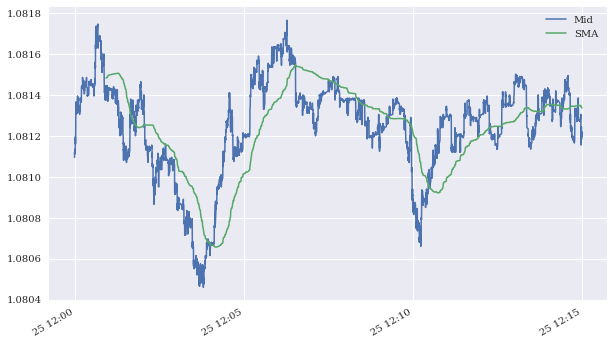

In [14]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=1.5);
plt.savefig('../../images/ch09/fxcm_plot_01.png')

## Retrieving Candles Data

In [15]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [16]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [17]:
start = dt.datetime(2020, 4, 1)
stop = dt.datetime(2020, 5, 1)

`period` must be one of `m1`, `H1` or `D1`

In [18]:
period = 'H1'

In [19]:
candles = cdr('EURUSD', start, stop, period)

In [20]:
data = candles.get_data()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2020-03-29 21:00:00 to 2020-05-01 20:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   600 non-null    float64
 1   BidHigh   600 non-null    float64
 2   BidLow    600 non-null    float64
 3   BidClose  600 non-null    float64
 4   AskOpen   600 non-null    float64
 5   AskHigh   600 non-null    float64
 6   AskLow    600 non-null    float64
 7   AskClose  600 non-null    float64
dtypes: float64(8)
memory usage: 42.2 KB


In [22]:
data[data.columns[:4]].tail()

,BidOpen,BidHigh,BidLow,BidClose
2020-05-01 16:00:00,1.09976,1.09996,1.09850,1.09874
2020-05-01 17:00:00,1.09874,1.09888,1.09785,1.09818
2020-05-01 18:00:00,1.09818,1.09820,1.09757,1.09766
2020-05-01 19:00:00,1.09766,1.09816,1.09747,1.09793
2020-05-01 20:00:00,1.09793,1.09812,1.09730,1.09788


In [23]:
data[data.columns[4:]].tail()

,AskOpen,AskHigh,AskLow,AskClose
2020-05-01 16:00:00,1.09980,1.09998,1.09853,1.09876
2020-05-01 17:00:00,1.09876,1.09891,1.09786,1.09818
2020-05-01 18:00:00,1.09818,1.09822,1.09758,1.09768
2020-05-01 19:00:00,1.09768,1.09818,1.09748,1.09795
2020-05-01 20:00:00,1.09795,1.09856,1.09733,1.09841


In [24]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)

In [25]:
data['SMA1'] = data['MidClose'].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()

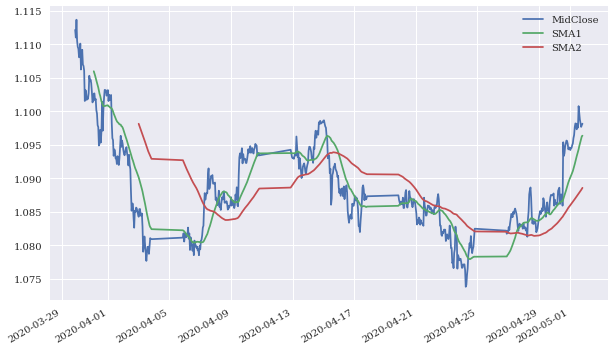

In [26]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));
plt.savefig('../../images/ch09/fxcm_plot_02.png')

## Connecting to the API

In [27]:
import fxcmpy

In [28]:
fxcmpy.__version__

'1.2.6'

In [29]:
api = fxcmpy.fxcmpy(config_file='../pyalgo.cfg')

In [30]:
instruments = api.get_instruments()

In [31]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/ILS', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'USEquities']


## Retrieving Historical Data

In [32]:
candles = api.get_candles('USD/JPY', period='D1', number=10)

In [33]:
candles[candles.columns[:4]]

,bidopen,bidclose,bidhigh,bidlow
date,,,,
2020-05-21 21:00:00,107.502,107.598,107.843,107.503
2020-05-22 21:00:00,107.598,107.595,107.757,107.316
2020-05-24 21:00:00,107.595,107.593,107.593,107.545
2020-05-25 21:00:00,107.593,107.667,107.776,107.545
2020-05-26 21:00:00,107.667,107.501,107.917,107.395
2020-05-27 21:00:00,107.501,107.706,107.941,107.359
2020-05-28 21:00:00,107.706,107.591,107.897,107.564
2020-05-29 21:00:00,107.591,107.767,107.891,107.071
2020-05-31 21:00:00,107.628,107.656,107.682,107.628


In [34]:
candles[candles.columns[4:]]

,askopen,askclose,askhigh,asklow,tickqty
date,,,,,
2020-05-21 21:00:00,107.589,107.613,107.854,107.528,189628
2020-05-22 21:00:00,107.613,107.661,107.770,107.329,168381
2020-05-24 21:00:00,107.661,107.660,107.667,107.635,6
2020-05-25 21:00:00,107.660,107.753,107.789,107.576,112616
2020-05-26 21:00:00,107.753,107.566,107.930,107.407,191402
2020-05-27 21:00:00,107.566,107.740,107.955,107.373,274980
2020-05-28 21:00:00,107.740,107.676,107.909,107.576,251491
2020-05-29 21:00:00,107.676,107.843,107.903,107.086,344564
2020-05-31 21:00:00,107.701,107.703,107.748,107.653,160


In [35]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 6, 1)

In [36]:
candles = api.get_candles('EUR/GBP', period='D1',
                          start=start, stop=end)

In [37]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 438 entries, 2019-01-02 22:00:00 to 2020-06-01 21:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   438 non-null    float64
 1   bidclose  438 non-null    float64
 2   bidhigh   438 non-null    float64
 3   bidlow    438 non-null    float64
 4   askopen   438 non-null    float64
 5   askclose  438 non-null    float64
 6   askhigh   438 non-null    float64
 7   asklow    438 non-null    float64
 8   tickqty   438 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 34.2 KB


The parameter `period` must be one of `m1, m5, m15, m30, H1, H2, H3, H4, H6, H8, D1, W1` or `M1`.

In [38]:
candles = api.get_candles('EUR/USD', period='m1', number=250)

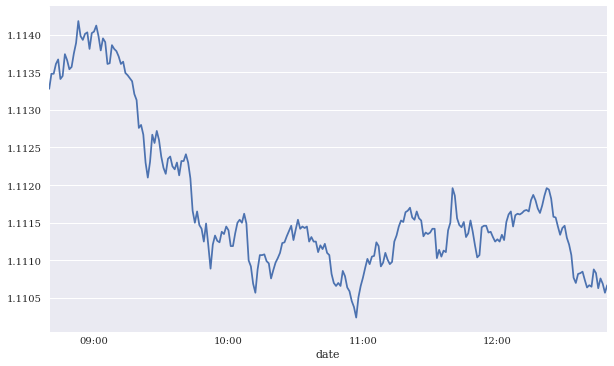

In [39]:
candles['askclose'].plot(figsize=(10, 6))
plt.savefig('../../images/ch09/fxcm_plot_03.png');

## Streaming Data

In [40]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' 
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'), 
             data['Rates'][0], data['Rates'][1]))

In [41]:
api.subscribe_market_data('EUR/USD', (output,))

  2 | EUR/USD | 2020-06-01 12:49:52.904000 | 1.11049, 1.11062
  3 | EUR/USD | 2020-06-01 12:49:54.481000 | 1.11055, 1.11066
  4 | EUR/USD | 2020-06-01 12:49:54.592000 | 1.11055, 1.11068
  5 | EUR/USD | 2020-06-01 12:49:57.317000 | 1.11057, 1.11068
  6 | EUR/USD | 2020-06-01 12:49:58.104000 | 1.11056, 1.11068
  7 | EUR/USD | 2020-06-01 12:49:58.827000 | 1.11055, 1.11068


In [42]:
api.get_last_price('EUR/USD')

Bid     1.11055
Ask     1.11068
High    1.11548
Low     1.10999
Name: 2020-06-01 12:49:58.827000, dtype: float64

In [43]:
api.unsubscribe_market_data('EUR/USD')

## Placing Orders

In [44]:
api.get_open_positions()

""


In [45]:
order = api.create_market_buy_order('EUR/USD', 100)

In [46]:
sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']

In [47]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,167805715,100,EUR/USD,-11.70591,True


In [48]:
order = api.create_market_buy_order('EUR/GBP', 50)

In [49]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,167805715,100,EUR/USD,-10.80536,True
1,167805717,50,EUR/GBP,-10.60469,True


In [50]:
order = api.create_market_sell_order('EUR/USD', 25)

In [51]:
order = api.create_market_buy_order('EUR/GBP', 50)

In [52]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,167805715,100,EUR/USD,-13.50706,True
1,167805717,50,EUR/GBP,-7.25536,True
2,167805718,25,EUR/USD,-1.12547,False
3,167805719,50,EUR/GBP,-11.72019,True


In [53]:
api.close_all_for_symbol('EUR/GBP')

In [54]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,167805715,100,EUR/USD,-17.10956,True
1,167805718,25,EUR/USD,-0.22510,False


In [55]:
api.close_all()

In [56]:
api.get_open_positions()

""


## Account Information

In [57]:
api.get_default_account()

1224934

In [58]:
api.get_accounts().T

,0
t,6
ratePrecision,0
accountId,1224934
balance,49924.1
usdMr,0
mc,N
mcDate,
accountName,01224934
usdMr3,0
hedging,Y


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>